In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stress-analysis-in-social-media/dreaddit-train.csv
/kaggle/input/stress-analysis-in-social-media/dreaddit-test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC

In [3]:
train = pd.read_csv('/kaggle/input/stress-analysis-in-social-media/dreaddit-train.csv')
train.shape

(2838, 116)

In [4]:
test = pd.read_csv('/kaggle/input/stress-analysis-in-social-media/dreaddit-test.csv')
test.shape

(715, 116)

In [5]:
full = pd.concat((train, test), sort=False).reset_index(drop=True)

In [6]:
df = full[['text','subreddit']].copy()
df.head()

,text,subreddit
0,"He said he had not felt that way before, sugge...",ptsd
1,"Hey there r/assistance, Not sure if this is th...",assistance
2,My mom then hit me with the newspaper and it s...,ptsd
3,"until i met my new boyfriend, he is amazing, h...",relationships
4,October is Domestic Violence Awareness Month a...,survivorsofabuse


In [7]:
pd.DataFrame(df.subreddit.unique()).values

array([['ptsd'],
       ['assistance'],
       ['relationships'],
       ['survivorsofabuse'],
       ['domesticviolence'],
       ['anxiety'],
       ['homeless'],
       ['stress'],
       ['almosthomeless'],
       ['food_pantry']], dtype=object)

# Word Clouds

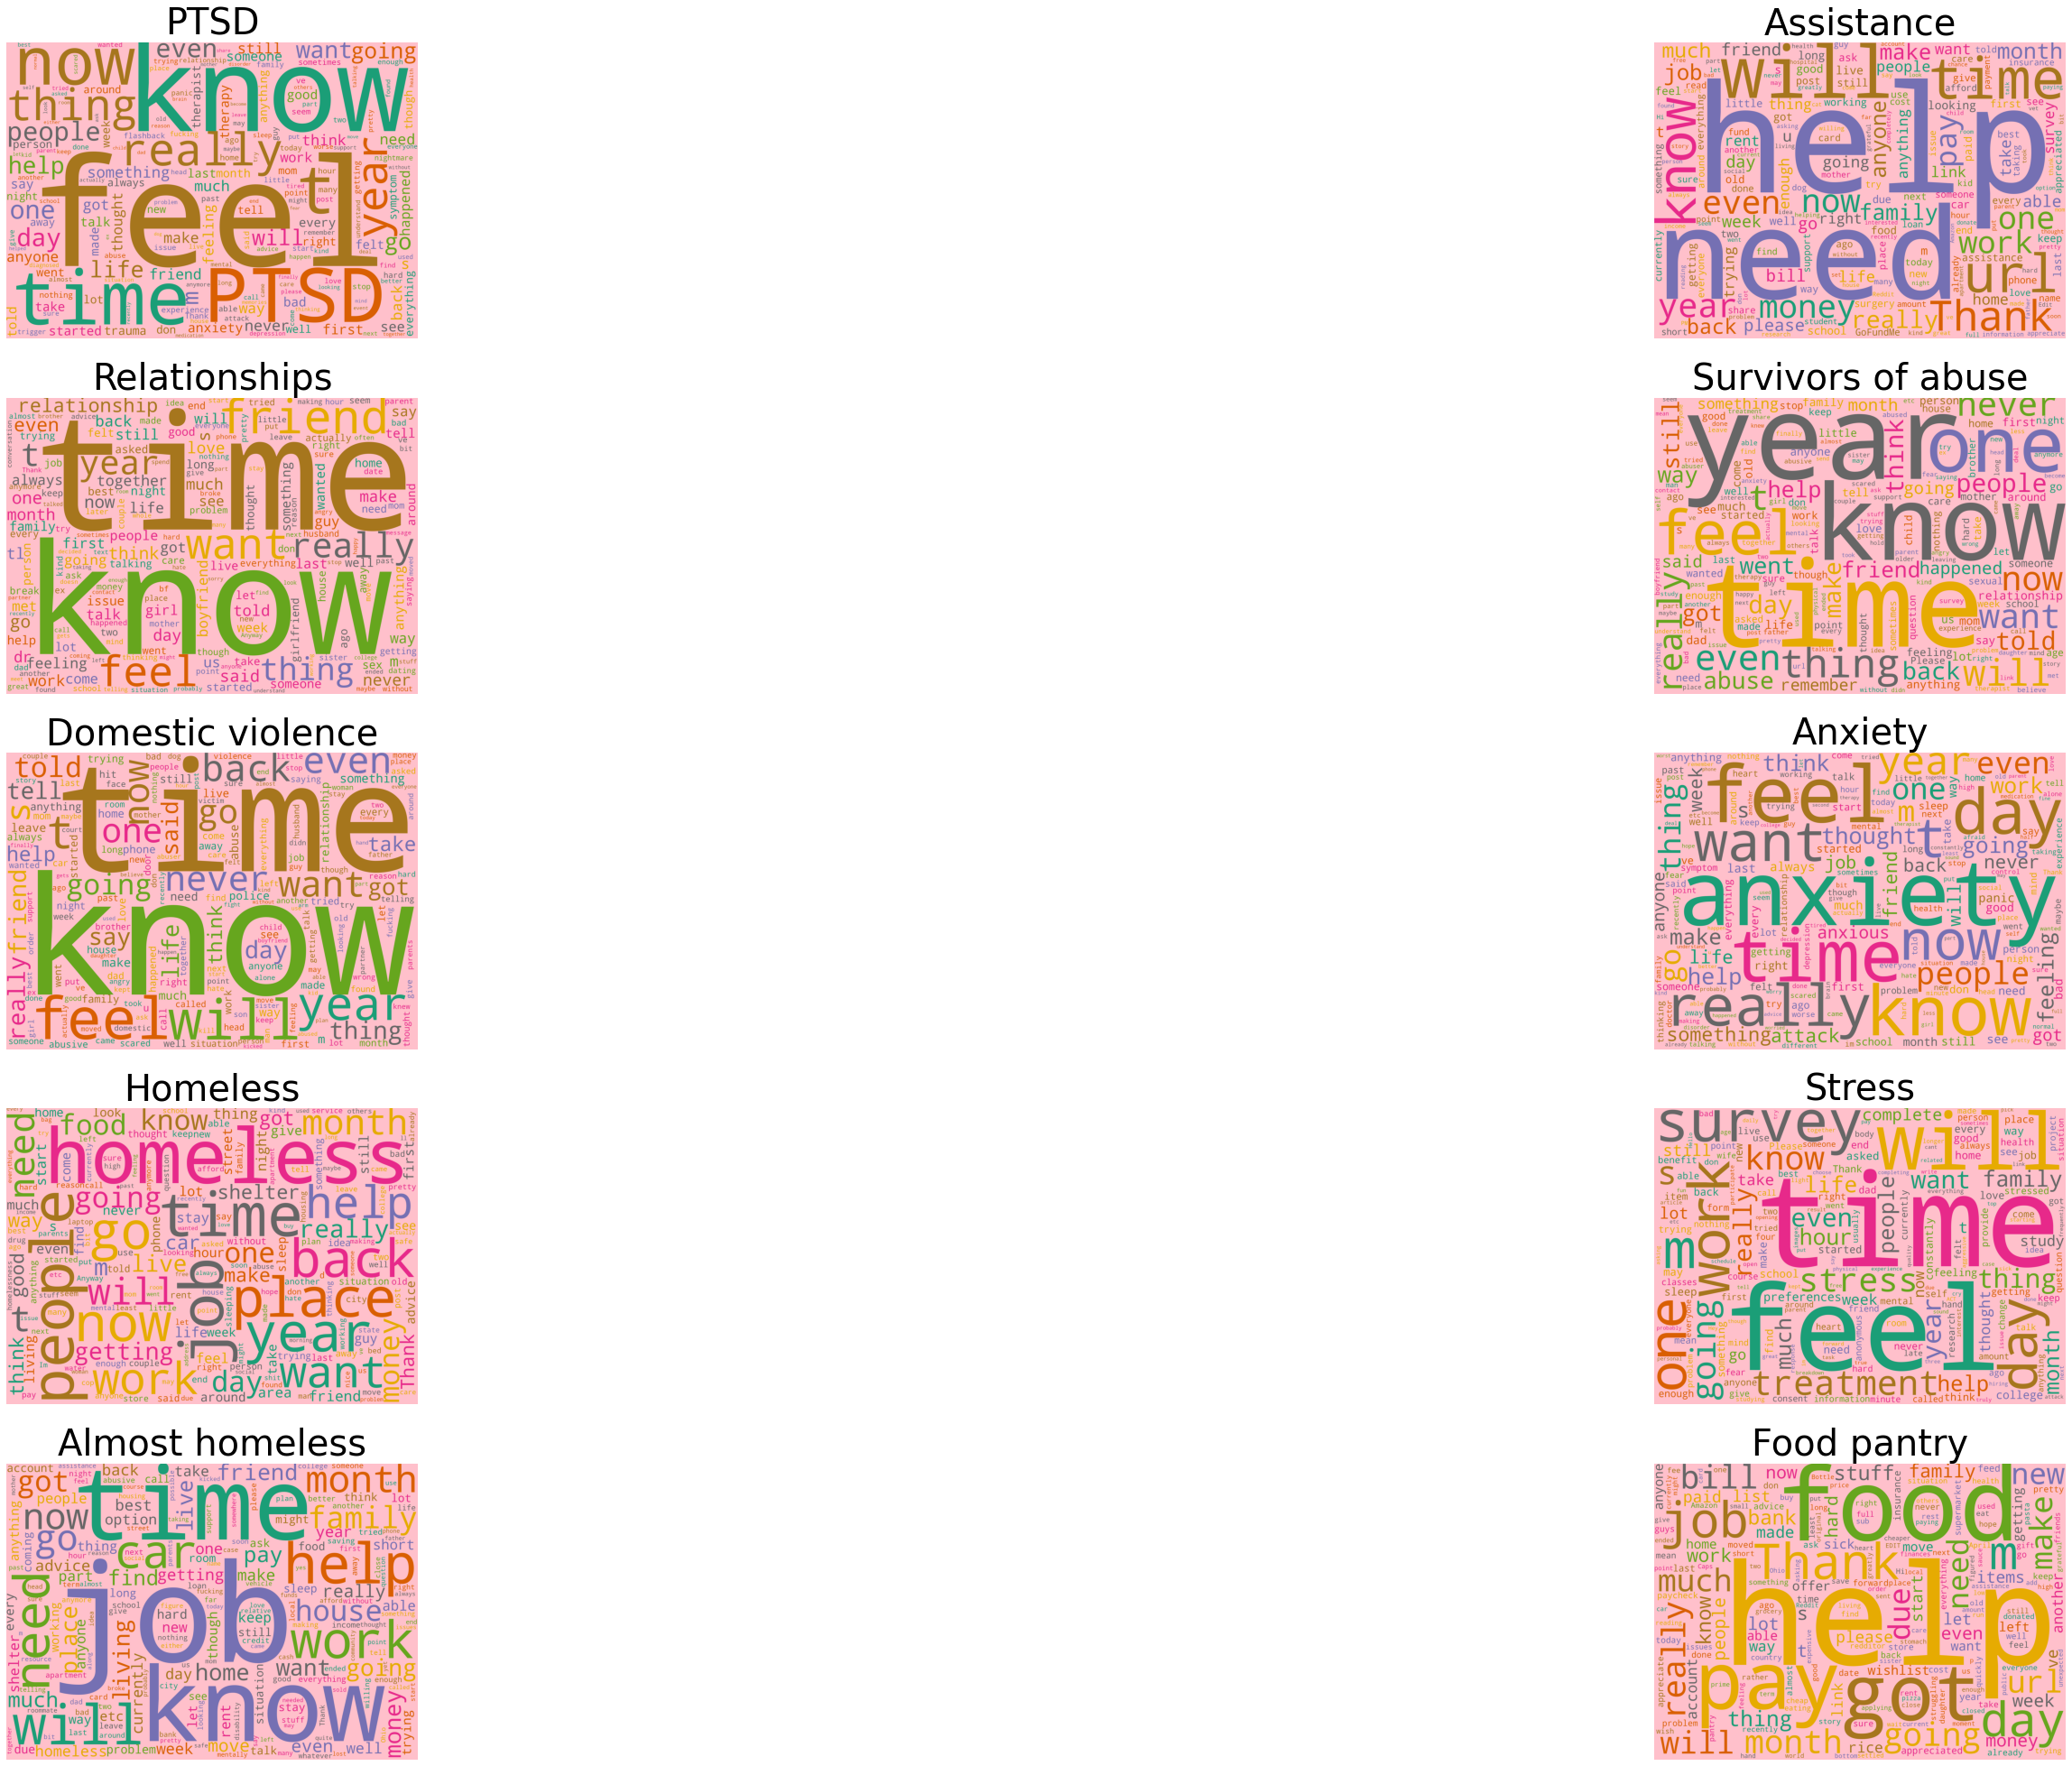

In [8]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(60,35))
subset = df[df['subreddit']=='ptsd']
text = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text))

plt.subplot(5,2,1)
plt.axis('off')
plt.title("PTSD",fontsize=40)
plt.imshow(cloud1)

subset = df[df['subreddit']=='assistance']
text = subset.text.values
cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,2)
plt.axis('off')
plt.title("Assistance",fontsize=40)
plt.imshow(cloud2)

subset = df[df['subreddit']=='relationships']
text = subset.text.values
cloud3=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,3)
plt.axis('off')
plt.title("Relationships",fontsize=40)
plt.imshow(cloud3)

subset = df[df['subreddit']=='survivorsofabuse']
text = subset.text.values
cloud4=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,4)
plt.axis('off')
plt.title("Survivors of abuse",fontsize=40)
plt.imshow(cloud4)

subset = df[df['subreddit']=='domesticviolence']
text = subset.text.values
cloud5=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,5)
plt.axis('off')
plt.title("Domestic violence",fontsize=40)
plt.imshow(cloud5)

subset = df[df['subreddit']=='anxiety']
text = subset.text.values
cloud6=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,6)
plt.axis('off')
plt.title("Anxiety",fontsize=40)
plt.imshow(cloud6)

subset = df[df['subreddit']=='homeless']
text = subset.text.values
cloud7=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,7)
plt.axis('off')
plt.title("Homeless",fontsize=40)
plt.imshow(cloud7)

subset = df[df['subreddit']=='stress']
text = subset.text.values
cloud8=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,8)
plt.axis('off')
plt.title("Stress",fontsize=40)
plt.imshow(cloud8)

subset = df[df['subreddit']=='almosthomeless']
text = subset.text.values
cloud9=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,9)
plt.axis('off')
plt.title("Almost homeless",fontsize=40)
plt.imshow(cloud9)

subset = df[df['subreddit']=='food_pantry']
text = subset.text.values
cloud10=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
                       ).generate(" ".join(text))
plt.subplot(5,2,10)
plt.axis('off')
plt.title("Food pantry",fontsize=40)
plt.imshow(cloud10)

# Сreating dictionaries

In [9]:
df['subreddit_id'] = df['subreddit'].factorize()[0]
subreddit_id_df = df[['subreddit', 'subreddit_id']].drop_duplicates()

subreddit_to_id = dict(subreddit_id_df.values)
id_to_subreddit = dict(subreddit_id_df[['subreddit_id', 'subreddit']].values)

df.head()

,text,subreddit,subreddit_id
0,"He said he had not felt that way before, sugge...",ptsd,0
1,"Hey there r/assistance, Not sure if this is th...",assistance,1
2,My mom then hit me with the newspaper and it s...,ptsd,0
3,"until i met my new boyfriend, he is amazing, h...",relationships,2
4,October is Domestic Violence Awareness Month a...,survivorsofabuse,3


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Text preprocessing

In [11]:
import re

def lower(text):
    return text.lower()

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def clean_text(text):
    text = lower(text)
    text = remove_stopwords(text)
    text = remove_punctuation(text)
    return text

#Apply function on column
df['clean_text']=df['text'].apply(clean_text)

# Removing common words

In [12]:
from collections import Counter
cnt=Counter()

for text in df['clean_text'].values:
    for word in text.split():
        cnt[word]+=1
        
cnt.most_common(10)

[('im', 1716),
 ('like', 1503),
 ('get', 1083),
 ('know', 1052),
 ('feel', 966),
 ('time', 947),
 ('would', 943),
 ('me', 855),
 ('really', 813),
 ('even', 752)]

In [13]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["clean_text"] = df["clean_text"].apply(lambda text: remove_freqwords(text))

# Words lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

df['clean_text']=df['clean_text'].apply(lambda text: lemmatizer_words(text))

In [15]:
df.head()

,text,subreddit,subreddit_id,clean_text
0,"He said he had not felt that way before, sugge...",ptsd,0,said felt way before suggeted go rest trigger ...
1,"Hey there r/assistance, Not sure if this is th...",assistance,1,hey rassistance sure right place post this go ...
2,My mom then hit me with the newspaper and it s...,ptsd,0,mom hit newspaper shocked this know play hitti...
3,"until i met my new boyfriend, he is amazing, h...",relationships,2,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,survivorsofabuse,3,october domestic violence awareness month dome...


In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

features = tfidf.fit_transform(df.clean_text).toarray()

labels = df.subreddit_id

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 3553 text is represented by 3835 features (TF-IDF score of unigrams and bigrams)


In [17]:
# Finding the three most correlated terms with each of the categories
N = 3
for subreddit, subreddit_id in sorted(subreddit_to_id.items()):
  features_chi2 = chi2(features, labels == subreddit_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(subreddit))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> almosthomeless:
  * Most Correlated Unigrams are: lined, penny, parttime
  * Most Correlated Bigrams are: minimum wage, month finally, soon possible

==> anxiety:
  * Most Correlated Unigrams are: attack, anxious, anxiety
  * Most Correlated Bigrams are: health anxiety, anxiety attack, panic attack

==> assistance:
  * Most Correlated Unigrams are: link, gofundme, url
  * Most Correlated Bigrams are: interested taking, gofundme url, amazon wishlist

==> domesticviolence:
  * Most Correlated Unigrams are: violence, domestic, police
  * Most Correlated Bigrams are: head wall, called police, domestic violence

==> food_pantry:
  * Most Correlated Unigrams are: wishlist, supermarket, rice
  * Most Correlated Bigrams are: health problem, new job, food bank

==> homeless:
  * Most Correlated Unigrams are: street, shelter, homeless
  * Most Correlated Bigrams are: need job, ive homeless, homeless shelter

==> ptsd:
  * Most Correlated Unigrams are: flashback, trauma, ptsd
  * Most Correl

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.25,
                                                    random_state = 20)

In [19]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.5174353205849269